In [2]:
#import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
%matplotlib inline
output_notebook()

Loading BokehJS ...

In [3]:
#import data
#"Source: U.S. Energy Information Administration"
#Units: thousand megawatthours
coal = pd.read_csv(r'/Users/nickthomas/projects_n_repos/projects/chicago_energy_usage/data/Net_generation_for_coal.csv')
nat_gas = pd.read_csv(r'/Users/nickthomas/projects_n_repos/projects/chicago_energy_usage/data/Net_generation_for_natural_gas.csv')
wind = pd.read_csv(r'/Users/nickthomas/projects_n_repos/projects/chicago_energy_usage/data/Net_generation_for_wind.csv')
renew = pd.read_csv(r'/Users/nickthomas/projects_n_repos/projects/chicago_energy_usage/data/Net_generation_for_other_renewables.csv')
nuclear = pd.read_csv(r'/Users/nickthomas/projects_n_repos/projects/chicago_energy_usage/data/Net_generation_for_nuclear.csv')
hydro = pd.read_csv(r'/Users/nickthomas/projects_n_repos/projects/chicago_energy_usage/data/Net_generation_for_conventional_hydroelectric.csv')
petro = pd.read_csv(r'/Users/nickthomas/projects_n_repos/projects/chicago_energy_usage/data/Net_generation_for_petroleum_liquids.csv')



In [4]:
#Add a column to delinate the source of electricity
coal['Source'] = 'coal'
nat_gas['Source'] = 'natural_gas'
wind['Source'] = 'wind'
renew['Source'] = 'renew'
nuclear['Source'] = 'nuclear'
hydro['Source'] = 'hydro'
petro['Source'] = 'petro'
df = pd.concat([coal, nat_gas, wind, renew, nuclear, hydro, petro])
for x in df.State.unique():
    df = df.replace(x, x[3:])
df.to_csv('source_generation.csv', index=False)

In [5]:
#Add a date column and convert date to a common column
dataframes = []
for x in df.columns[1:-1]:
    placeholders = ['State', 'Source']
    temp = df[placeholders]
    temp['Date'] = str(x)
    temp['Electricity'] = df[x]
    dataframes.append(temp)

/Users/nickthomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/nickthomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
#Concat all dataframes together
start = dataframes[0]
for x in dataframes[1:]:
    start = pd.concat([start, x])
df = start


In [7]:
#Fix Date heading and export to csv
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m')
df.to_csv('Electricity_Generation_Date.csv')

In [8]:
#electricity generation by type
source = []
energy = []
for x in df.Source.unique():
    source.append(x)
    energy.append(df[df['Source'] == x].sum())

In [9]:
#Create a way to view by state
print('Enter the initials state you want to view(to see the total for the US leave blank):')
ab = str(input()).upper()
if ab in df.State.unique():
    df_ = df[df['State'] == ab]
    x = ab
else:
    df_ = df
    x = 'US'

Enter the initials state you want to view(to see the total for the US leave blank):



In [10]:
#Create categories
coal = pd.DataFrame(df_[df_['Source'] == 'coal'].groupby('Date')['Electricity'].sum()).reset_index()
nat_gas = pd.DataFrame(df_[df_['Source'] == 'natural_gas'].groupby('Date')['Electricity'].sum()).reset_index()
wind = pd.DataFrame(df_[df_['Source'] == 'wind'].groupby('Date')['Electricity'].sum()).reset_index()
renew = pd.DataFrame(df_[df_['Source'] == 'renew'].groupby('Date')['Electricity'].sum()).reset_index()
nuclear = pd.DataFrame(df_[df_['Source'] == 'nuclear'].groupby('Date')['Electricity'].sum()).reset_index()
hydro = pd.DataFrame(df_[df_['Source'] == 'hydro'].groupby('Date')['Electricity'].sum()).reset_index()
petro = pd.DataFrame(df_[df_['Source'] == 'petro'].groupby('Date')['Electricity'].sum()).reset_index()

Text(0, 0.5, 'Electricity generated(thousand megawatt per hour)')

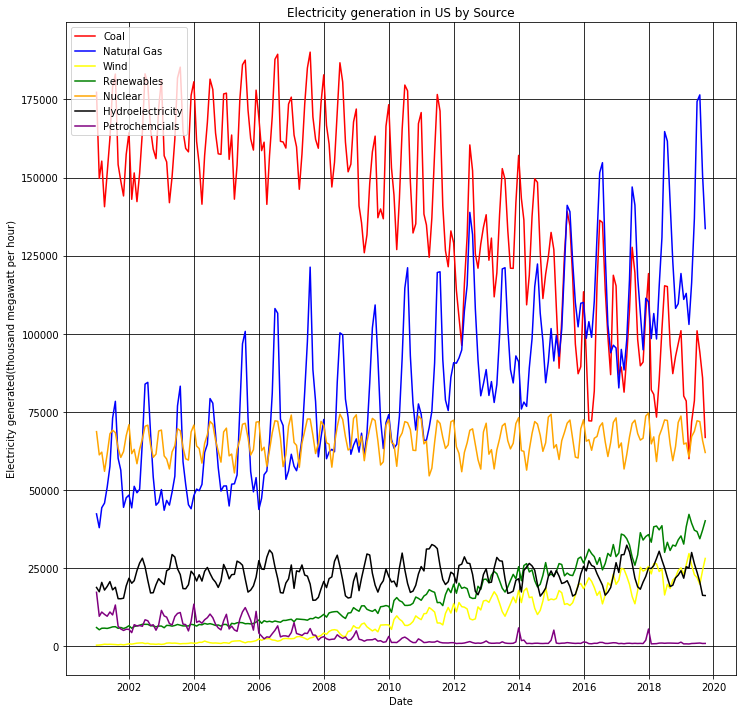

In [11]:
#Time series of source

plt.figure(figsize=[12, 12])
plt.plot(coal.Date, coal.Electricity, color='red', label='Coal')
plt.plot(nat_gas.Date, nat_gas.Electricity, color='blue', label='Natural Gas')
plt.plot(wind.Date, wind.Electricity, color='yellow', label='Wind')
plt.plot(renew.Date, renew.Electricity, color='green', label='Renewables')
plt.plot(nuclear.Date, nuclear.Electricity, color='orange', label='Nuclear')
plt.plot(hydro.Date, hydro.Electricity, color='black', label='Hydroelectricity')
plt.plot(petro.Date, petro.Electricity, color='purple', label='Petrochemcials')
plt.legend(loc='upper left')
#plt.xticks(np.arange(226), coal.Date)
plt.grid(color='black')
plt.title(f'Electricity generation in {x} by Source')
plt.xlabel('Date')
plt.ylabel('Electricity generated(thousand megawatt per hour)')

Text(0.5, 1.0, 'Electricity generated in US since 2000')

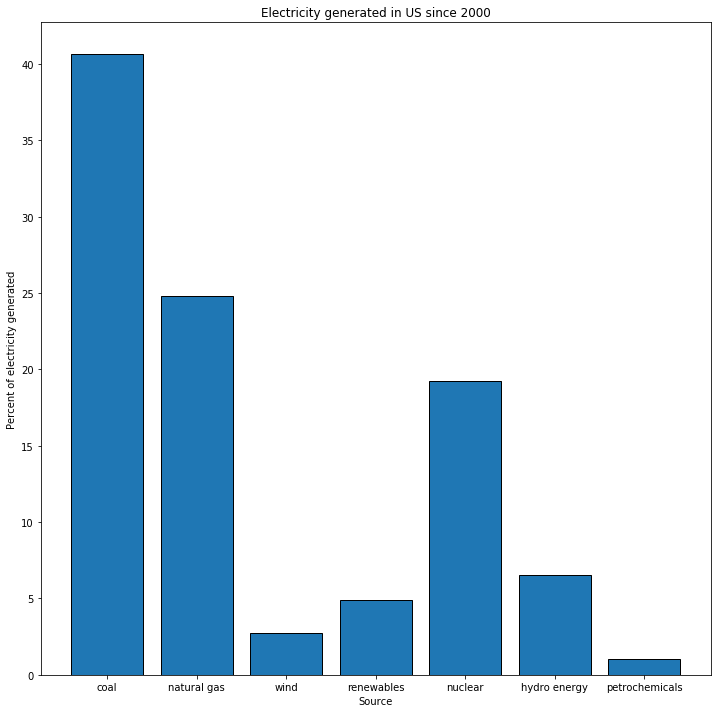

In [12]:
#Bar chart of electricity generation in the US
total = df_.Electricity.sum()
electricity = [(coal.Electricity.sum() / df_.Electricity.sum()) * 100, (nat_gas.Electricity.sum() / df_.Electricity.sum())  * 100, (wind.Electricity.sum() / df_.Electricity.sum())  * 100, (renew.Electricity.sum() / df_.Electricity.sum())  * 100, (nuclear.Electricity.sum() / df_.Electricity.sum())  * 100, (hydro.Electricity.sum() / df_.Electricity.sum())  * 100, (petro.Electricity.sum() / df_.Electricity.sum())  * 100]
sources = ['coal', 'natural gas', 'wind', 'renewables', 'nuclear', 'hydro energy', 'petrochemicals']
plt.figure(figsize=[12, 12])
plt.bar(sources, electricity, edgecolor='Black')
plt.xticks(label=sources)
plt.ylabel('Percent of electricity generated')
plt.xlabel('Source')
plt.title(f'Electricity generated in {x} since 2000')

## Develop

In [13]:
#Bokeh graph of energy generation in the US
p = figure(x_axis_type="datetime", title='Energy Generation in the US')
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Electricity'

p.line(datetime(coal.Date), coal.Electricity.sum(), color='Black')
p.line(datetime(nat_gas.Date), nat_gas.Electricity.sum(), color='Black')
p.line(datetime(wind.Date), wind.Electricity.sum(), color='Black')
p.line(datetime(renew.Date), renew.Electricity.sum(), color='Black')
p.line(datetime(nuclear.Date), nuclear.Electricity.sum(), color='Black')
p.line(datetime(hydro.Date), hydro.Electricity.sum(), color='Black')
p.line(datetime(petro.Date), petro.Electricity.sum(), color='Black')
p.legend.location = "top_left"

show(p)

NameError: name 'datetime' is not defined

In [ ]:
pd.DataFrame(df[df['Source'] == 'coal'].groupby('Date')['Electricity'].sum()).reset_index()

In [ ]:
#Graphs for each source of energy
for x in df_2019.Source.unique():
    print(x)
    temp = df_2019[df_2019['Source'] == x].sort_values(by='201910', ascending=False).head()
    print(temp.State)
    print(temp['201910'])
    print(temp['201910'].sum())
    p = figure(x_range=temp.State, title="Engery generation by thousand megawatthours 10/2019")
    p.vbar(x=temp.State, top=temp['201910'],width=0.9)

    p.xgrid.grid_line_color = None
    p.y_range.start = 0

    show(p)
    print('\n')

In [ ]:
#Create a dataframe for Oct 2019
cols = ['State', '201910','Source']
df_201910 = df[cols]

In [ ]:
#Create totals for each state
df_201910['Totals'] = ''
for x in df_201910.State.unique():
    temp = df_201910[df_201910['State'] == x]
    not_temp = df_201910[df_201910['State'] != x]
    temp = temp.replace('', temp['201910'].sum())
    df_201910 = pd.concat([temp, not_temp])

In [ ]:
#Create percentage column
df_201910['Percentage'] = (df_201910['201910'] / df_201910['Totals']) * 100
df_201910 = df_201910.replace(np.nan, 0)

In [ ]:
#Graphs for each State
for x in df_201910.State.unique():
    print(x)
    temp = df_201910[df_201910['State'] == x]
    print(temp['201910'].sum())
    p = figure(x_range=temp.Source, title="Engery generation percentage 10/2019")
    p.vbar(x=temp.Source, top=temp['Percentage'],width=0.9)

    p.xgrid.grid_line_color = None
    p.y_range.start = 0

    show(p)
    print('\n')

In [14]:
df

,State,Source,Date,Electricity
0,AK,coal,2001-01-01,46.90300
1,AL,coal,2001-01-01,6557.91300
2,AR,coal,2001-01-01,2149.80800
3,AZ,coal,2001-01-01,3418.45400
4,CA,coal,2001-01-01,199.85700
...,...,...,...,...
46,VT,petro,2019-10-01,NaN
47,WA,petro,2019-10-01,2.36364
48,WI,petro,2019-10-01,5.83818
49,WV,petro,2019-10-01,4.10168
